## 01標準的Fully Connected (Dense) NN_多層感知器MLP

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 下載Mnist資料集

In [4]:
from tensorflow.keras.datasets import mnist

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 查看訓練資料

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

In [10]:
print(len(x_train), len(y_train))

60000 60000


In [11]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [12]:
# 自訂函式show_img以黑白灰階來顯示2*2吋大小的數字圖片，參數image是指要顯示的圖片。

def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) # 數字圖片大小
    plt.imshow(image, cmap='binary') # 黑白灰階顯示
    plt.show()

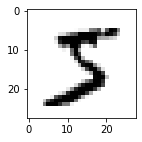

In [13]:
show_image(x_train[0])

In [14]:
print(y_train[0])

5


In [15]:
# 自訂函式show_images_labels_predictions同時查看多筆訓練資料

def show_images_labels_prediction(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    # 最多可以顯示25張圖，預設是10張
    if num > 25:  
        num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[start_id], cmap='binary')
        
        # 有AI預測結果資料，才在標題顯示預測結果
        if (len(predictions) > 0):
            title = 'ai = ' + str(predictions[start_id])
            #預測正確顯示 O，預測錯誤顯示 X。
            title += ('(O)' if predictions[start_id] == labels[start_id] else '(X)')
            title += '\nlabel = ' + str(labels[start_id])
        #沒有AI預測結果資料，只在標題顯示真實數數值
        else:
            title = 'label = ' + str(labels[start_id])
            
        ax.set_title(title, fontsize=12)
        # X, Y軸不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

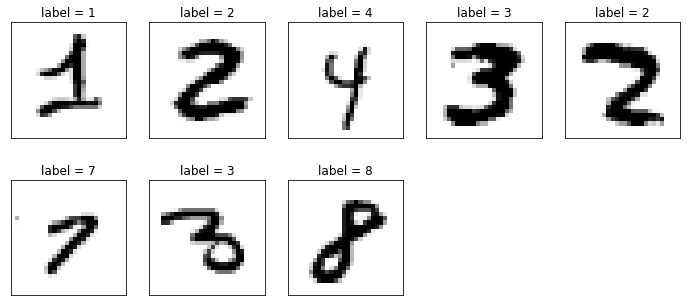

In [16]:
show_images_labels_prediction(x_train, y_train, [], 24, 8)

### Feature 資料預處理

In [17]:
# 將28*28的數字圖片轉換為784個數字的一維向量，再將每個數字都轉換為float數字
x_train = x_train.reshape(len(x_train), 784).astype('float32')
x_test = x_test.reshape(len(x_test), 784).astype('float32')

In [18]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [19]:
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [20]:
# 標準化Normalize: 資料是0~255的數字，因此為了得到0~1之間的數字，全部除以255
x_train = x_train/255
x_test = x_test/255

In [38]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### label資料預處理

In [22]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
from tensorflow.keras.utils import to_categorical

# 為了提升模型效率，輸出通常採用one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [36]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 建立模型

In [25]:
from tensorflow.keras.models import Sequential

# 建立空的模型框架
model = Sequential()

In [26]:
from tensorflow.keras.layers import Dense

# 建立輸入層和隱藏層
model.add(Dense(units=256, input_dim=784, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
#建立輸出層
model.add(Dense(units=10, activation='softmax'))

In [28]:
# 組裝模型: 設定模型的訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### 進行訓練
`model.fit(x=特徵值, y=標籤, validation_split=驗證資料百分比, epochs=訓練次數, batch_size=每批讀取多少筆資料, verbose=n)`
* `validation_split`: 設定驗證資料百分比，例如0.2表示將訓練資料保留20%當作驗證資料。省略時將不保留驗證資料，全部資料都會作訓練用。
* `verbose`: 設定是否顯示訓練過程。0(不顯示)、1(詳細顯示)、2(簡易顯示)，預設是1。
      
訓練結果說明：
1. loss: 使用訓練資料得到的損失函式誤差值(值愈小代表準確率愈高)。
2. acc: 使用訓練資料得到的評估準確率(值介於0~1之間，愈大代表準確率愈高)。
3. val_loss: 使用驗證資料得到的損失函式誤差值(值愈小代表準確率愈高)。
4. val_acc: 使用驗證資料得到的評估準確率(值介於0~1之間，愈大代表準確率愈高)。

In [30]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=2)
#model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 1s - loss: 0.3805 - acc: 0.8939 - val_loss: 0.2026 - val_acc: 0.9437
Epoch 2/10
48000/48000 - 1s - loss: 0.1735 - acc: 0.9503 - val_loss: 0.1488 - val_acc: 0.9581
Epoch 3/10
48000/48000 - 1s - loss: 0.1242 - acc: 0.9645 - val_loss: 0.1192 - val_acc: 0.9655
Epoch 4/10
48000/48000 - 1s - loss: 0.0951 - acc: 0.9733 - val_loss: 0.1096 - val_acc: 0.9682
Epoch 5/10
48000/48000 - 2s - loss: 0.0766 - acc: 0.9779 - val_loss: 0.0946 - val_acc: 0.9724
Epoch 6/10
48000/48000 - 1s - loss: 0.0614 - acc: 0.9827 - val_loss: 0.0946 - val_acc: 0.9721
Epoch 7/10
48000/48000 - 1s - loss: 0.0508 - acc: 0.9863 - val_loss: 0.0877 - val_acc: 0.9750
Epoch 8/10
48000/48000 - 1s - loss: 0.0420 - acc: 0.9892 - val_loss: 0.0810 - val_acc: 0.9757
Epoch 9/10
48000/48000 - 1s - loss: 0.0346 - acc: 0.9912 - val_loss: 0.0832 - val_acc: 0.9739
Epoch 10/10
48000/48000 - 1s - loss: 0.0285 - acc: 0.9930 - val_loss: 0.0817 - val_acc: 0.9768


### 評估準確率

In [33]:
scores = model.evaluate(x_test, y_test)
print('準確率: ', scores[1])

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0716 - acc: 0.9777
準確率:  0.9777


### 進行預測

In [34]:
predict = model.predict_classes(x_test)

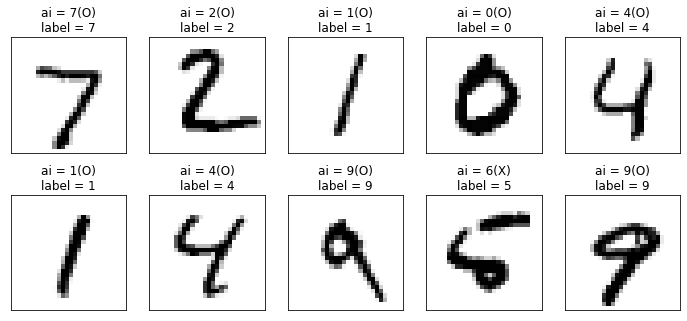

In [40]:
show_images_labels_prediction(x_test, y_test, predict, 0)

神經網路預測是: 6


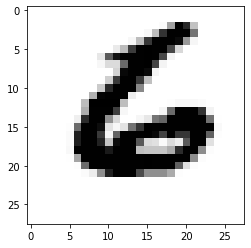

In [41]:
n = 9999

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n], cmap='Greys')
#plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

### 模型儲存與載入

In [43]:
model.save('Mnist_mlpNN_model.h5')

In [44]:
del model

### 載入模型

In [49]:
from tensorflow.keras.models import load_model

model = load_model('Mnist_mlpNN_model.h5')

In [47]:
# 讀入資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
# 資料處理
x_test = x_test.reshape(len(x_test), 784)/255

In [50]:
prediction = model.predict_classes(x_test)

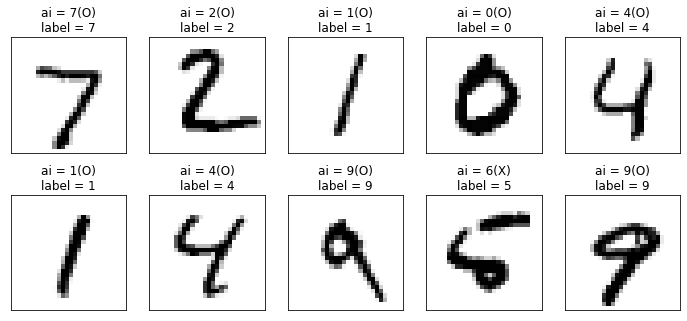

In [54]:
show_images_labels_prediction(x_test.reshape(len(x_test), 28, 28), y_test, prediction, 0)

### 預測自己的數字圖片

In [2]:
import glob, cv2

In [3]:
files = glob.glob("imagedata\*.jpg")

In [6]:
test_feature = []
test_label = []

for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    test_feature.append(img)
    label = file[10:11]
    test_label.append(int(label))

In [7]:
test_feature

[]